# **Import dataset from Kaggle**



In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d manjilkarki/deepfake-and-real-images

Dataset URL: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images
License(s): unknown
 99% 1.67G/1.68G [00:15<00:00, 120MB/s] 
100% 1.68G/1.68G [00:15<00:00, 118MB/s]


In [ ]:
!unzip deepfake-and-real-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Validation/Real/real_5499.jpg  
  inflating: Dataset/Validation/Real/real_55.jpg  
  inflating: Dataset/Validation/Real/real_550.jpg  
  inflating: Dataset/Validation/Real/real_5500.jpg  
  inflating: Dataset/Validation/Real/real_5501.jpg  
  inflating: Dataset/Validation/Real/real_5502.jpg  
  inflating: Dataset/Validation/Real/real_5503.jpg  
  inflating: Dataset/Validation/Real/real_5504.jpg  
  inflating: Dataset/Validation/Real/real_5505.jpg  
  inflating: Dataset/Validation/Real/real_5506.jpg  
  inflating: Dataset/Validation/Real/real_5507.jpg  
  inflating: Dataset/Validation/Real/real_5508.jpg  
  inflating: Dataset/Validation/Real/real_5509.jpg  
  inflating: Dataset/Validation/Real/real_551.jpg  
  inflating: Dataset/Validation/Real/real_5510.jpg  
  inflating: Dataset/Validation/Real/real_5511.jpg  
  inflating: Dataset/Validation/Real/real_5512.jpg  
  inflating: Dataset/Validation/Real/real_5513.jpg  

# **<h2 style="color: Black;">Import The Necessary Library</h2>**


In [ ]:
import tensorflow as tf
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, Input,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import L2, L1
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# **<h2 style="color: BLack;">Data Collection</h2>**


In [ ]:
train_directory = "/content/Dataset/Train"
val_directory = "/content/Dataset/Validation"

In [ ]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE":224,
    "LEARNING_RATE": 1e-3,
    "N_EPOCHS": 10,
    "DROPOUT_RATE": 0.5,
    "REGULARIZATION_RATE": 0.001,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 2,
    "PATCH_SIZE": 32,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ["Fake","Real"]
}

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True
)

Found 140002 files belonging to 2 classes.


In [ ]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=1,#CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99
)

Found 39428 files belonging to 2 classes.


# **<h2 style="color: black;">Pre-Fetch The Data For The Training Process</h2>**


In [ ]:
training_dataset = (
    train_dataset
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
validation_dataset = (
    val_dataset
    .prefetch(tf.data.AUTOTUNE)
)

# **<h2 style="color: black;">Model Building</h2>**

In [ ]:
input_shape = (224, 224, 3)
# Load the EfficientNetB0 model, excluding the top layers (include_top=False)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
# Freeze the base model
base_model.trainable = False

# Create a Sequential model and add layers
model = models.Sequential()

# Add the EfficientNet base model
model.add(base_model)

# Add a global average pooling layer
model.add(layers.GlobalAveragePooling2D())

# Add a dropout layer for regularization
model.add(layers.Dropout(0.5))

# Add a dense layer with softmax activation for classification
model.add(layers.Dense(CONFIGURATION["NUM_CLASSES"], activation = "sigmoid"))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
loss_function = BinaryCrossentropy()

In [ ]:
model.compile(
  optimizer = Adam(learning_rate = CONFIGURATION["LEARNING_RATE"]),
  loss = loss_function,metrics=['accuracy']
)

# **<h2 style="color: black;">Model Training</h2>**


In [ ]:
history =model.fit(
  training_dataset,
  validation_data = validation_dataset,
  batch_size= CONFIGURATION["BATCH_SIZE"],

  epochs = CONFIGURATION["N_EPOCHS"],
  verbose = 1
)

Epoch 1/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 491s 107ms/step - accuracy: 0.7367 - loss: 0.5268 - val_accuracy: 0.7953 - val_loss: 0.4413
Epoch 2/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 428s 93ms/step - accuracy: 0.7611 - loss: 0.4871 - val_accuracy: 0.7960 - val_loss: 0.4380
Epoch 3/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 474s 100ms/step - accuracy: 0.7618 - loss: 0.4884 - val_accuracy: 0.7995 - val_loss: 0.4336
Epoch 4/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 405s 93ms/step - accuracy: 0.7617 - loss: 0.4861 - val_accuracy: 0.7905 - val_loss: 0.4475
Epoch 5/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 488s 103ms/step - accuracy: 0.7626 - loss: 0.4874 - val_accuracy: 0.7946 - val_loss: 0.4420
Epoch 6/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 436s 100ms/step - accuracy: 0.7618 - loss: 0.4888 - val_accuracy: 0.7938 - val_loss: 0.4428
Epoch 7/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 444s 100ms/step - accuracy: 0.7628 - loss: 0.4864 - val_accuracy: 0.7939 - val_loss: 0.4413
Epoch 8/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 408s 92ms/step - accur

# **<h2 style="color: black;">Visualization Of The Loss</h2>**


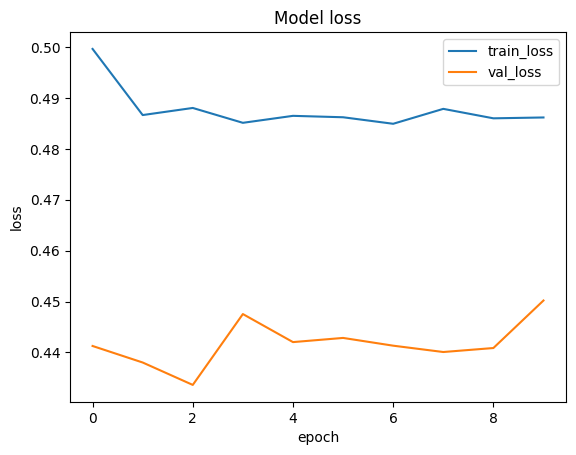

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

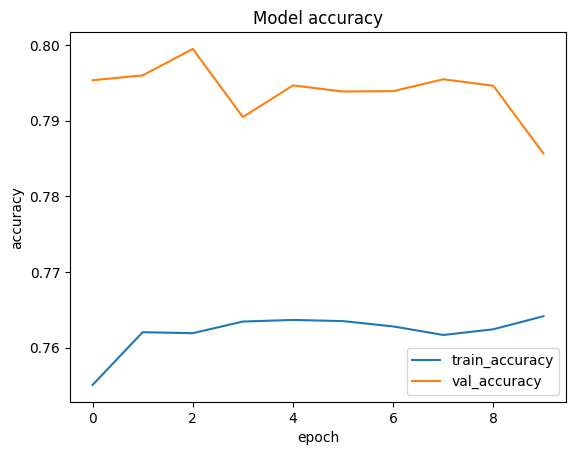

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

# **<h2 style="color: black;">Test The Model</h2>**


In [ ]:
TESTDATA='/content/Dataset/Test'

In [ ]:
import tensorflow as tf

# Load the test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    TESTDATA,  # Replace with your test data directory
    image_size=(224, 224),  # Image size should match the input shape of your model
    batch_size=32,  # Batch size
    shuffle=False  # Ensure the data is not shuffled
)

Found 10905 files belonging to 2 classes.


In [ ]:
class_names = test_dataset.class_names
print(class_names)

['Fake', 'Real']


In [ ]:
# Predict using the model
y_pred = model.predict(test_dataset)
print(y_pred)
# Convert predictions to class labels
y_pred_classes = tf.argmax(y_pred, axis=1)

341/341 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step
[[0.8992527  0.10074448]
 [0.7492493  0.25070688]
 [0.9169641  0.08304238]
 ...
 [0.37101832 0.6289896 ]
 [0.09273186 0.9072739 ]
 [0.25115633 0.74884844]]


In [ ]:
y_true = []
for images, labels in test_dataset:
    y_true.extend(labels.numpy())

y_true = tf.convert_to_tensor(y_true)

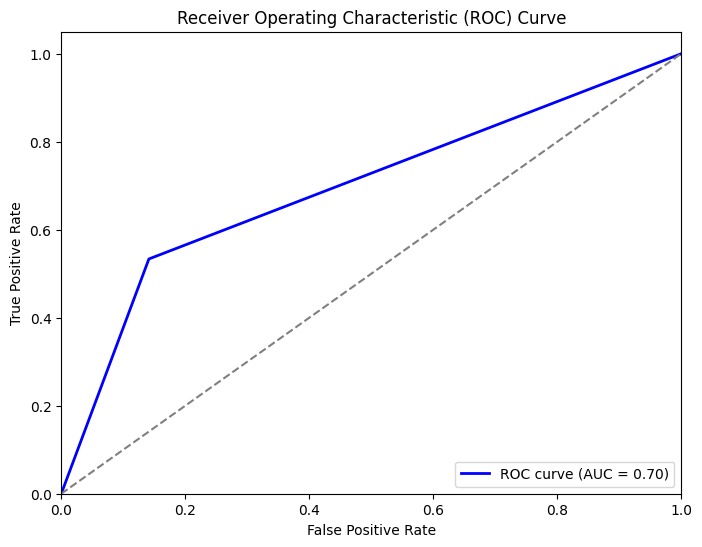

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_pred_classes)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4716  776]
 [2525 2888]]


<h2 style="color: black;">Confusion Matrix</h2>


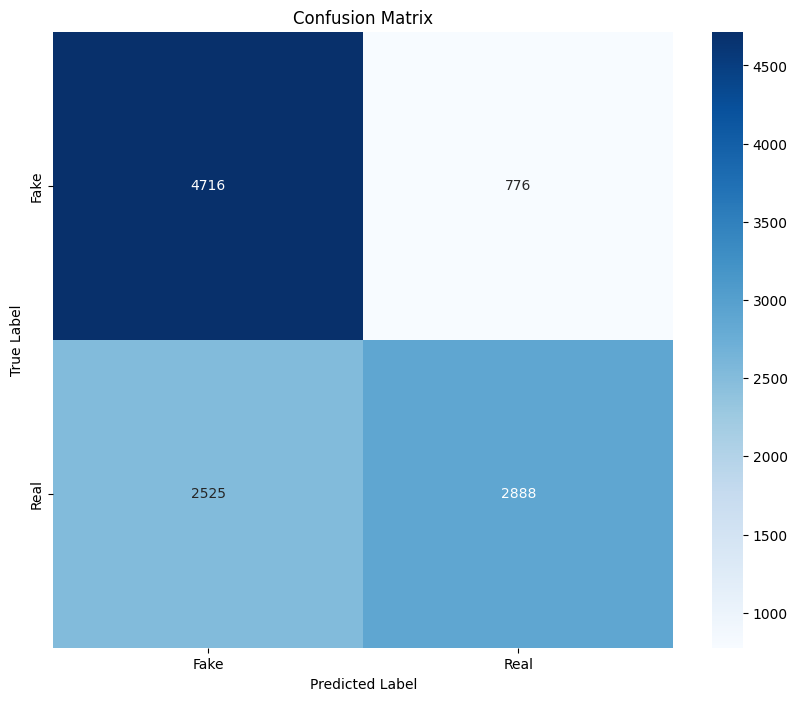

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<h2 style="color: black;">Save The Model</h2>


In [ ]:
model.save('deepfake.h5')